In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns   

In [3]:
fish = pd.read_csv('fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
X = fish.iloc[:, 1:]
y = fish.loc[:, 'Species']

In [7]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)


[[1.46666667e-01 3.04854369e-01 3.09090909e-01 3.58108108e-01
  5.68334049e-01 4.18978349e-01]
 [1.75757576e-01 3.20388350e-01 3.25454545e-01 3.78378378e-01
  6.24055350e-01 4.59235453e-01]
 [2.06060606e-01 3.18446602e-01 3.29090909e-01 3.76689189e-01
  6.18123353e-01 5.14278868e-01]
 [2.20000000e-01 3.65048544e-01 3.74545455e-01 4.17229730e-01
  6.38566105e-01 4.80364795e-01]
 [2.60606061e-01 3.68932039e-01 3.74545455e-01 4.25675676e-01
  6.21965801e-01 5.76003608e-01]
 [2.72727273e-01 3.74757282e-01 3.87272727e-01 4.37500000e-01
  6.89202837e-01 5.46882048e-01]
 [3.03030303e-01 3.74757282e-01 3.87272727e-01 4.34121622e-01
  7.22699465e-01 5.96371786e-01]
 [2.36363636e-01 3.90291262e-01 3.92727273e-01 4.42567568e-01
  6.35083524e-01 5.13419035e-01]
 [2.72727273e-01 3.90291262e-01 3.92727273e-01 4.44256757e-01
  7.12565153e-01 5.35098106e-01]
 [3.03030303e-01 4.07766990e-01 4.05454545e-01 4.62837838e-01
  7.25433291e-01 5.51392648e-01]
 [2.87878788e-01 4.05825243e-01 4.10909091e-01 4.6

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
clf = LogisticRegression()

In [11]:
clf.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion Matrix')

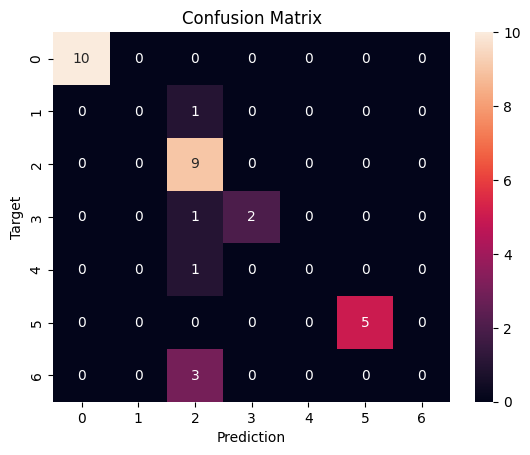

In [14]:
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
